## Softmax_Classification



In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.14.0


##  데이터 생성

- x_data, y_data : 파이선 2차원 리스트 구조

- y_data = [0, 0, 1]  : 고양이, y_data = [0, 1, 0]  : 강아지, y_data = [1, 0, 0]  : 토끼

In [2]:
x_data = [[1, 2, 1, 1],   # 고양이 사진 데이터
          [2, 1, 3, 2],
          [3, 1, 3, 4],
          [4, 1, 5, 5],   # 강아지 사진 데이터
          [1, 7, 5, 5],
          [1, 2, 5, 6],
          [1, 6, 6, 6],   # 토끼 사진 데이터
          [1, 7, 7, 7]]
y_data = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]

x_data

[[1, 2, 1, 1],
 [2, 1, 3, 2],
 [3, 1, 3, 4],
 [4, 1, 5, 5],
 [1, 7, 5, 5],
 [1, 2, 5, 6],
 [1, 6, 6, 6],
 [1, 7, 7, 7]]

## convert into numpy array data

In [3]:
x_data = np.asarray(x_data, dtype=np.float32)
y_data = np.asarray(y_data, dtype=np.float32)

x_data

array([[1., 2., 1., 1.],
       [2., 1., 3., 2.],
       [3., 1., 3., 4.],
       [4., 1., 5., 5.],
       [1., 7., 5., 5.],
       [1., 2., 5., 6.],
       [1., 6., 6., 6.],
       [1., 7., 7., 7.]], dtype=float32)

In [4]:
y_data

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

## class의 갯수 : 3개, one hot encoding

- [0, 0, 1] : 고양이
- [0, 1, 0] : 강아지
- [1, 0, 0] : 토끼

In [5]:
nb_classes = 3

print(x_data.shape)
print(y_data.shape)

(8, 4)
(8, 3)


## 파라메터 정의

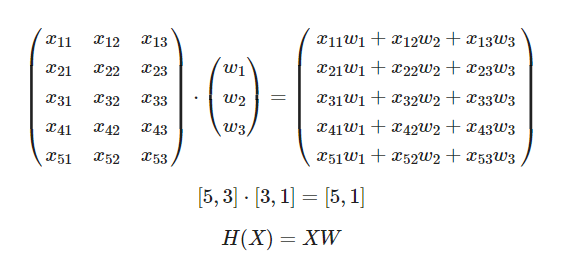

- X -> [8,4],  W -> [4,3], b ->[1,3],  H ->[8,3]
- H = XW + b
- [8,4] x [4,3] = [8,3]

In [6]:
W = tf.Variable(tf.random.normal((4, nb_classes)), name='weight')
b = tf.Variable(tf.random.normal((nb_classes,)), name='bias')

print("weigths = ",W)
print("bias = ",b)

weigths =  <tf.Variable 'weight:0' shape=(4, 3) dtype=float32, numpy=
array([[ 2.2094717 , -0.06017815,  1.1033685 ],
       [ 0.9424996 ,  1.6736753 ,  2.7639432 ],
       [ 1.1336596 ,  0.8516999 , -1.4044974 ],
       [ 0.42977694,  0.03122993, -1.3056903 ]], dtype=float32)>
bias =  <tf.Variable 'bias:0' shape=(3,) dtype=float32, numpy=array([-0.9603297 ,  1.5681677 , -0.43791804], dtype=float32)>


## hypothesis 정의
- softmax activation function : tf.nn.softmax

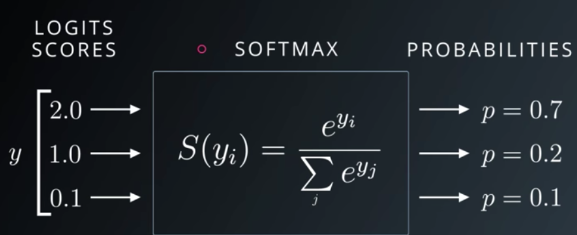

In [7]:
def hypothesis(X):
    return tf.nn.softmax(tf.matmul(X, W) + b)

print(hypothesis(x_data))

tf.Tensor(
[[2.42244869e-01 6.85837626e-01 7.19175562e-02]
 [9.48936582e-01 5.10467663e-02 1.65989750e-05]
 [9.97500658e-01 2.49904511e-03 1.79463044e-07]
 [9.99900997e-01 9.88843749e-05 6.55126370e-11]
 [1.21900007e-01 8.78087759e-01 1.22956990e-05]
 [8.88932288e-01 1.11067645e-01 1.75266945e-09]
 [3.62885416e-01 6.37114584e-01 8.25021829e-08]
 [3.51255000e-01 6.48745000e-01 6.87620094e-09]], shape=(8, 3), dtype=float32)


## Softmax Test

In [8]:
test_data = [[1,1,1,1]]
test_data = np.asarray(test_data, dtype=np.float32)

print(hypothesis(test_data).numpy())
hypothesis(test_data).numpy()[0,0] + hypothesis(test_data).numpy()[0,1] + hypothesis(test_data).numpy()[0,2]

[[0.41480035 0.56527567 0.01992399]]


1.0

## Cost function

In [9]:
def cost_fn(X, Y):
    logits = hypothesis(X)
    cost = -tf.reduce_sum(Y * tf.math.log(logits), axis=1)
    cost_mean = tf.reduce_mean(cost)
    return cost_mean

print(cost_fn(x_data, y_data))

tf.Tensor(5.3475995, shape=(), dtype=float32)


## grad funcion

In [10]:
variables = [W, b]

def grad_fn(X, Y):
    with tf.GradientTape() as tape:
        loss = cost_fn(X, Y)
        grads = tape.gradient(loss, variables)
        return grads

print(grad_fn(x_data, y_data))

[<tf.Tensor: shape=(4, 3), dtype=float32, numpy=
array([[ 1.1071496 , -0.36614513, -0.7410045 ],
       [-0.28773874,  0.76974654, -0.48200768],
       [ 0.97141504, -0.10541886, -0.86599624],
       [ 1.0886021 , -0.2226038 , -0.86599827]], dtype=float32)>, <tf.Tensor: shape=(3,), dtype=float32, numpy=array([ 0.3641945 ,  0.00181217, -0.36600664], dtype=float32)>]


## 실행

In [11]:
def fit(X, Y):
    optimizer =  tf.keras.optimizers.SGD(learning_rate=0.1)

    for i in range(2000):
        grads = grad_fn(X, Y)
        optimizer.apply_gradients(zip(grads, variables))
        if (i%100==0):
            print('Loss at epoch %d: %f' %(i, cost_fn(X, Y).numpy()))

fit(x_data, y_data)

Loss at epoch 0: 4.719395
Loss at epoch 100: 0.613973
Loss at epoch 200: 0.533942
Loss at epoch 300: 0.478884
Loss at epoch 400: 0.433670
Loss at epoch 500: 0.392886
Loss at epoch 600: 0.353960
Loss at epoch 700: 0.315458
Loss at epoch 800: 0.277930
Loss at epoch 900: 0.253169
Loss at epoch 1000: 0.239781
Loss at epoch 1100: 0.227828
Loss at epoch 1200: 0.216997
Loss at epoch 1300: 0.207129
Loss at epoch 1400: 0.198098
Loss at epoch 1500: 0.189800
Loss at epoch 1600: 0.182148
Loss at epoch 1700: 0.175070
Loss at epoch 1800: 0.168504
Loss at epoch 1900: 0.162396


## Prediction

In [12]:
x_test = [[2,1,3,2]] #  [[0,0,1]] : 고양이
x_test = np.asarray(x_test, dtype=np.float32)

result = hypothesis(x_test)

print(result.numpy() )
print(tf.argmax(result , 1))

[[0.00203222 0.08587288 0.9120949 ]]
tf.Tensor([2], shape=(1,), dtype=int64)


## x_data로 검증

In [ ]:
result = hypothesis(x_data)
print(result)
print(tf.argmax(result, 1))
print(tf.argmax(y_data, 1))

tf.Tensor(
[[1.4538788e-10 1.5945694e-05 9.9998397e-01]
 [5.3607590e-05 2.4361230e-02 9.7558510e-01]
 [2.0326171e-12 5.2676458e-02 9.4732350e-01]
 [3.6105683e-09 9.5287263e-01 4.7127314e-02]
 [9.2290916e-02 9.0414572e-01 3.5634015e-03]
 [4.9053382e-02 9.5094639e-01 2.5822703e-07]
 [8.8815969e-01 1.1184003e-01 2.6120262e-07]
 [9.9031758e-01 9.6824588e-03 2.4854324e-10]], shape=(8, 3), dtype=float32)
tf.Tensor([2 2 2 1 1 1 0 0], shape=(8,), dtype=int64)
tf.Tensor([2 2 2 1 1 1 0 0], shape=(8,), dtype=int64)
